# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [1]:
from pymongo import MongoClient
client = MongoClient()

In [2]:
db = client['test']
collection = db['benchmarklogs']

In [3]:
import pprint

#pprint.pprint(collection.find_one())
#for item in collection.find():
#    pprint.pprint(item)


# PyMongo Query ->Pandas DataFrame

In [4]:
import pandas as pd

query = {"$and":[ {"$or":[ {"usedGenesisJson":"genesis_poa_period_2.json"},{"usedGenesisJson":"genesis_poa_period_4.json"},{"usedGenesisJson":"genesis_poa_period_8.json"},{"usedGenesisJson":"genesis_poa_period_12.json"},{"usedGenesisJson":"genesis_poa_period_15.json"},{"usedGenesisJson":"genesis_poa_period_20.json"} ]}, 
        {"maxTransactions": 1000}, {"instanceType":'c5.xlarge'}, {"nodes":5}]}

# query = {}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

# Pandas DataFrame -> Plot
## Throughput

In [5]:
import matplotlib.pyplot as plt

data_tps = df[['txPerSecond','usedGenesisJson']]
#print(data_tps)

title = "Effect of Block Period on Throughput in PoA"
xlabel = "Block Period [seconds]"
ylabel = "Transactions Per Second (TPS)"


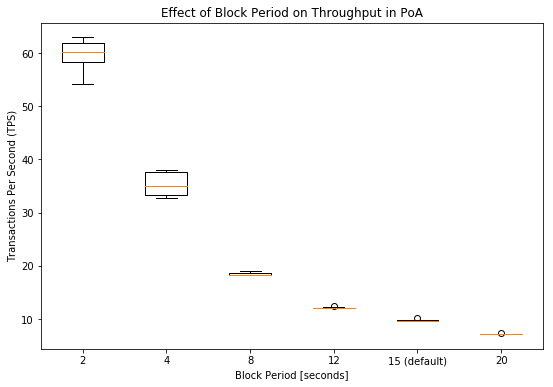

In [6]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_2.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_4.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_8.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_12.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_15.json"].iloc[:,0],
                data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_20.json"].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=list(["2","4","8","12","15 (default)","20"]))
fig.savefig("period_poa_throughput_boxplot.svg", format="svg")



59.544398665118365
35.34210197413544
18.45313677238607
12.169735427115047
9.734193237503856
7.234795445284092


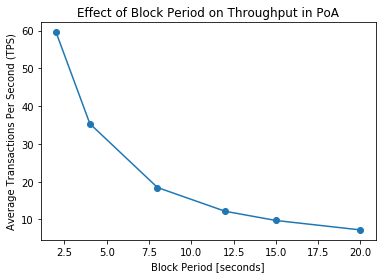

In [7]:

avg2 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_2.json"].iloc[:,0].mean()
avg4 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_4.json"].iloc[:,0].mean()
avg8 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_8.json"].iloc[:,0].mean()
avg12 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_12.json"].iloc[:,0].mean()
avg15 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_15.json"].iloc[:,0].mean()
avg20 = data_tps.loc[df['usedGenesisJson'] == "genesis_poa_period_20.json"].iloc[:,0].mean()

print(avg2)
print(avg4)
print(avg8)
print(avg12)
print(avg15)
print(avg20)

plt.plot([2,4,8,12,15,20], [avg2,avg4,avg8,avg12,avg15,avg20], marker='o')
plt.title(title)
plt.ylabel("Average Transactions Per Second (TPS)")
plt.xlabel(xlabel)
plt.savefig("period_poa_throughput_lines_average.svg", format="svg")
plt.show()

## Latency

In [8]:
data_latency = df[['averageDelay','usedGenesisJson']]
#print(data_latency)

title = "Effect of Block Period on Latency in PoA"
xlabel = "Block Period [seconds]"
ylabel = "Transaction Latency [seconds]"

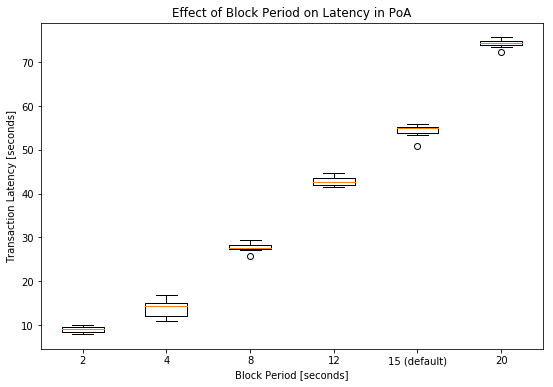

In [9]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot

## combine these different collections into a list    
data_to_plot = [data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_2.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_4.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_8.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_12.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_15.json"].iloc[:,0],
                data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_20.json"].iloc[:,0]]

bp = ax.boxplot(data_to_plot,labels=list(["2","4","8","12","15 (default)","20"]))
fig.savefig("period_poa_latency_boxplot.svg", format="svg")

8.932774999999996
13.879691
27.70766680000001
42.880310300000005
54.38966380000001
74.33067650000004


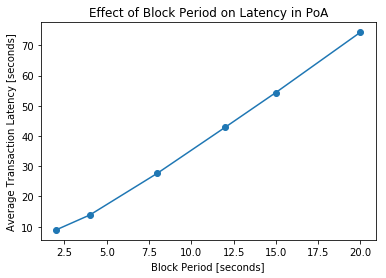

In [10]:
avg2 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_2.json"].iloc[:,0].mean()
avg4 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_4.json"].iloc[:,0].mean()
avg8 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_8.json"].iloc[:,0].mean()
avg12 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_12.json"].iloc[:,0].mean()
avg15 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_15.json"].iloc[:,0].mean()
avg20 = data_latency.loc[df['usedGenesisJson'] == "genesis_poa_period_20.json"].iloc[:,0].mean()

print(avg2)
print(avg4)
print(avg8)
print(avg12)
print(avg15)
print(avg20)

plt.plot([2,4,8,12,15,20], [avg2,avg4,avg8,avg12,avg15,avg20], marker='o')
plt.title(title)
plt.ylabel("Average Transaction Latency [seconds]")
plt.xlabel(xlabel)
plt.savefig("period_poa_latency_lines_average.svg", format="svg")
plt.show()